In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using StatsBase
using Alert

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,η::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)-1                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(sqrt(2*η*Δt)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

In [3]:
function radio_prom(tiradas::Int64)
    #Vamos a obtener el promedio en cada tiempo del radio
    A=[] #Usaremos un arreglo de arreglos de las diferentes tiradas
    for i=1:tiradas          #En el ciclo for produciremos varias tiradas
        K=OUH(k0,γK,t,Δt,ηK,ctek)   
        T=OUH(t0,γT,t,Δt,ηT,ctet)
        push!(A,RADIO.(K,T))   # Colocamos en A los diferentes procesos de los radios
    end
    A=transpose(hcat(A...)) #lo convertimos a una matriz para facilitar el tratamiento
    #RAD=Float64[]  #colocaremos el 
    #for i=1:length(t)     #indexaremos del 1 hasta el último paso para hacer el promedio
    #    @inbounds Rm=mean(A[:,i]) #transpose "transpose(hcat(A...))" convierte el arreglo en una matriz para usar el "[:,i]" para usar las columnas de la matriz
    #    push!(RAD,Rm)
    #end
    RADVV=Vector{Float64}(undef, length(t))
    RADV=Vector{Float64}(undef, length(t))
    RAD=Vector{Float64}(undef, length(t))
    for i=1:length(t)
        @inbounds RAD[i]=mean(A[:,i])
        @inbounds RADV[i]=var(A[:,i],mean=RADIOM(t[i],γK,γT,k0,t0,ctek,ctet))
        @inbounds RADVV[i]=var(A[:,i])
    end
    A=0
    return RAD, RADV, RADVV
end

radio_prom (generic function with 1 method)

In [4]:
RADIO(K::Float64,T::Float64)=K/(K^2+T^2)
RADIOM(t::Float64,γK,γT,k0,t0,ctek,ctet)=(k0*exp(-γK*t)+ctek*(1-exp(-γK*t)))/((k0*exp(-γK*t)+ctek*(1-exp(-γK*t)))^2+(t0*exp(-γT*t)+ctet*(1-exp(-γT*t)))^2)

RADIOM (generic function with 1 method)

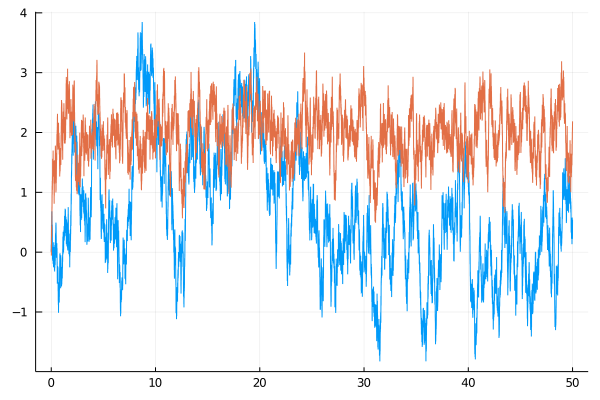

In [15]:
k0=0.01
t0=0.01

γK=1.0
γT=5.0

ηK=1.0
ηT=1.0

N=50.0

Δt=0.001

t=0:Δt:N

ctek=1.0
ctet=2.0

K=OUH(k0,γK,t,Δt,ηK,ctek)
T=OUH(t0,γT,t,Δt,ηT,ctet)
plot(t,K,legend=false)
plot!(t,T,legend=false)

In [16]:
@time RAD, RADV,RADVV=radio_prom(5000);
RADVV=sqrt.(RADVV)
RADV=sqrt.(RADV)
PASO=1
plot(t[PASO:end],RAD[PASO:end],color="red",lw = 1.5,xlabel="tiempo [t]", ylabel="radio [m]",ylims=(-2.0,2.0),ribbon=RADV)
#plot!(t[PASO:end],RAD[PASO:end],color="blue",lw = 1.5,xlabel="tiempo [t]", ylabel="radio [m]",ylims=(0.2,0.25),ribbon=RADVV)

 19.638849 seconds (1.14 M allocations: 13.066 GiB, 27.62% gc time)


In [17]:
###SOLO PARA GRAFICAR
PASO=1
plot(t[PASO:end],RADIO.(K,T)[PASO:end],legend=false)
A=[]

tiradas=10
for i=1:tiradas
    K=OUH(k0,γK,t,Δt,ηK,ctek)
    T=OUH(t0,γT,t,Δt,ηT,ctet)
    push!(A,RADIO.(K,T))
    plot!(t[PASO:end],A[i][PASO:end])
    #savefig("./Prueba.png")
end

plot!(t[PASO:end],RAD[PASO:end],color="red",lw = 1.5,xlabel="tiempo [t]", ylabel="radio [m]",ribbon=RADV)
plot!(t,RADIOM.(t,γK,γT,k0,t0,ctek,ctet),color="black",lw = 2.0,xlims=(0,15),ylims=(0,0.35))
savefig("./Prueba.png")

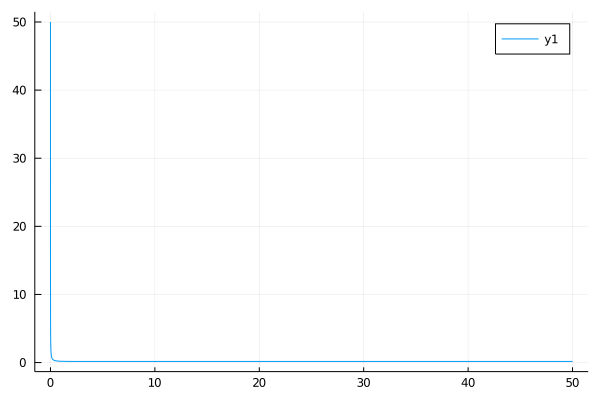

In [13]:
plot(t,RADIOM.(t,γK,γT,k0,t0,ctek,ctet))

In [ ]:
RADIOM(t,γK,γT,k0,t0,ctek,ctet)

In [48]:
var(a, mean=1000)

1.0000606125590507e6